# Miniclip - Technical Challenge

---

##Insights
This is a Data Analyst Challenge for Combat Elite, a game with 4-player matches and purchasable products. The challenge aims to evaluate a candidate's ability to analyze data, derive insights, and communicate findings. The datasets include user activity, matches played, in-app purchases, and gold purchases.


Section 1: User Acquisition and Activity Analysis
- In January 2024, the game acquired 694 new users, with a majority (86.2%) coming from the Android platform.
- The daily activity count started low but gradually increased throughout the month, reaching a peak of 90 unique users on January 30th.
- New user acquisition followed a similar trend, with the highest peak of 34 new users on January 30th.

Section 2: Daily Matches Activity and Game & Match Data
- Match Type C emerged as the most popular, accounting for 58.7% of all matches played and the highest number of first-place finishes.
- Match Type B was the least popular, contributing to only 4.1% of the total matches.
- On average, each unique player engaged in approximately 9 matches during the analyzed period.
- The daily match activity analysis revealed consistent higher engagement for Match Type C, with notable spikes indicating increased player interest.

Section 3: In-App Purchases Analysis
- The majority of the revenue was generated from the sale of Gold (44.5%), followed by Promotions (29.7%) and Remove Ads (25.8%).
- While Gold generated the most revenue, Remove Ads had the highest number of purchases (38%), followed by Promotions (34.5%) and Gold (27.5%).
- The number of purchases fluctuated over time, with significant spikes observed for Remove Ads, Gold, and Promotions during specific periods.

Section 4: User Engagement and Expenditure Metrics for In-Game Products
- The product group with the most purchases was 'Weapon' (4513 purchases), followed by 'Energy' (1082), 'Boosts' (619), and 'Gear' (610).
- Players spent the most gold on 'Gear' (4.7M) and 'Weapon' (4.1M), indicating their popularity and high value.
- The number of purchases varied over time, with several peaks suggesting periods of high activity or events triggering increased purchases.

Section 5: Analysis of New Users' Purchases
- User 9411 showed the highest engagement, with 40 activity counts, 8 days logged on, and the most purchases (220), indicating a high level of investment in the game.
- User 9411 also spent the most, both in terms of dollar purchase value ($199.60) and gold spend (18970.00).
- New users 1677 and 4270 have started making purchases, indicating their willingness to spend on the game, albeit at a lower level compared to User 9411.

# 0. Importing and cleaning of data set - CODE

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from tabulate import tabulate

#Load data
daily_activity = pd.DataFrame(pd.read_csv('data_activity.csv'))
matches = pd.DataFrame(pd.read_csv('data_matches.csv'))
purchases = pd.DataFrame(pd.read_csv('data_in_app_purchases.csv'))
virtual_purchases = pd.DataFrame(pd.read_csv('data_virtual_purchase.csv'))

## Cleaning up the naming function for platform. As IOS and ANDROID were captilised differently, so intead of 2 platforms there for 4, this sloves the problem
daily_activity['platform'] = daily_activity['platform'].str.capitalize()

#Dropping rows of missing values. As its just >3%, should not have much effect on grander scheme of things
#No missing data for Virtual purchases

daily_activity = daily_activity.dropna()
purchases = purchases.dropna()
matches = matches.dropna()

#checking for duplicate rows
#Prints the number of duplicate rows

dataframes = [daily_activity, matches, purchases, virtual_purchases]
for df in dataframes:
    df.dropna(inplace=True)

# no need to remove duplicate rows, as there's non

#Converts data types of columns in a dataframe based on a dictionary.
def convert_dtypes(df, convert_dict):
    return df.astype(convert_dict)

# Define conversion dictionaries for each dataframe
convert_dicts = {
  'daily_activity': {
    'user_id': 'int64',
    'platform': 'category',
    'activity_date': 'datetime64[ns]',
    'acquisition_date': 'datetime64[ns]',
  },
  'matches': {
    'user_id': 'int64',
    'activity_date': 'datetime64[ns]',
    'match_type': 'category',
    'finish_position': 'int64',
    'bots': 'int64',
    'n_matches': 'int64',
  },
  'purchases': {
    'user_id': 'int64',
    'activity_date': 'datetime64[ns]',
    'purchase_number': 'int64',
    'product_group': 'category',
    'dollar_purchase_value': 'float64',
  },
  'virtual_purchases': {
    'user_id': 'int64',
    'activity_date': 'datetime64[ns]',
    'product_group': 'category',
    'n_purchases': 'int64',
    'gold_spend': 'int64',
  }
}

# Convert data types for each dataframe
for name, df in zip(convert_dicts.keys(), dataframes):
    df = convert_dtypes(df, convert_dicts[name])

<ipython-input-1-488f929e3f84>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


# 1. User Acquisition and Activity Analysis

**Section 1: User Acquisition and Activity Analysis**

1 - Number of Users Acquired in January 2024: According to the analysis, the game acquired 694 new users in January 2024. This represents a significant influx of new players during the month.

2 - Distribution between Platforms (Android and iOS) for New Users: The pie chart titled "Distribution of Distinct Users by Platform" shows that an overwhelming majority of the new users (86.2%) were from the Android platform, while only 13.8% were from iOS. This indicates a strong preference for Android devices among the newly acquired user base.

3 - Daily Activity Count: The line chart titled "Daily Activity Count" illustrates the daily activity levels of users throughout January 2024. The activity started relatively low, with only 11 unique users on January 1st. However, it gradually increased over the month, reaching a peak of 90 unique users on January 30th. By the end of the month, the daily activity count stood at 83 unique users.

4 - Daily Activity Count Across Platforms: The "Daily Activity Count Across Platforms" chart provides a breakdown of daily activity by platform (Android, iOS, and All Platforms). It is evident that the daily activity is primarily driven by Android users, closely following the overall trend. The iOS user activity is relatively lower but shows similar fluctuations.

5 - Number of New Users Acquired Over Time: The line chart titled "Number of New Users Acquired Over Time" depicts the acquisition of new users on a daily basis throughout January 2024. The acquisition started with 21 new users on January 1st and experienced several fluctuations throughout the month. The highest peak was observed on January 30th, with 34 new users acquired on that day. The month ended with 16 new users acquired on January 31st.

6 - Acquisition by Platform: The "Acquisition by Platform" chart breaks down the daily acquisition of new users by platform (Android and iOS). Similar to the overall distribution, the majority of new users were acquired on the Android platform, with several spikes in acquisition throughout the month. The iOS platform saw relatively lower acquisition levels, with smaller fluctuations.


Overall, the analysis reveals that the game experienced a significant influx of new users in January 2024, primarily driven by the Android platform. The daily activity levels gradually increased throughout the month, reaching a peak towards the end of January. While Android users dominated the user base and daily activity, the iOS platform saw a relatively lower but consistent level of activity and acquisition.


# Section 1 - Code

In [2]:
# Get a list of unique user IDs
unique_user_ids = daily_activity['user_id'].unique()

# Find the number of unique users
num_unique_users = len(unique_user_ids)

print(f"Number of unique users: {num_unique_users}")

Number of unique users: 694


In [3]:
# Plotting with Plotly
fig_platform_pie = px.pie(daily_activity.groupby('platform')['user_id'].nunique().reset_index(),
             values='user_id', names='platform',
             title='Distribution of Distinct Users by Platform',
             template='plotly_white')

fig_platform_pie.update_layout(height=400, width=1500);

In [4]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# Assuming 'daily_activity' DataFrame is already defined

# Group by 'platform' and 'activity_date', count unique user IDs
grouped_df_platform = daily_activity.groupby(['platform', 'activity_date'])['user_id'].nunique().reset_index()

# Group by 'activity_date' and count unique user IDs
grouped_df_all = daily_activity.groupby('activity_date')['user_id'].nunique().reset_index()

# Create a subplot with 1 row and 2 columns
fig_all = make_subplots(rows=1, cols=2, subplot_titles=('Daily Activity Count', 'Daily Activity Count Across Platforms'))

# Add the second line plot to the first subplot
fig_all.add_trace(go.Scatter(x=grouped_df_all['activity_date'], y=grouped_df_all['user_id'], mode='lines', name='All Platforms'), row=1, col=1)

# Add the first line plot to the second subplot
for platform in grouped_df_platform['platform'].unique():
    df_filtered = grouped_df_platform[grouped_df_platform['platform'] == platform]
    fig_all.add_trace(go.Scatter(x=df_filtered['activity_date'], y=df_filtered['user_id'], mode='lines', name=platform), row=1, col=2)

# Update layout if needed
fig_all.update_layout(title='User Activity Analysis', showlegend=True, height=500, width=1500);


In [5]:
# Group by 'acquisition_date' and count unique user IDs
new_users_by_date = daily_activity.groupby('acquisition_date')['user_id'].nunique().reset_index()

# Group by 'platform' and 'acquisition_date', count unique user IDs
grouped_df = daily_activity.groupby(['platform', 'acquisition_date'])['user_id'].nunique().reset_index()

# Create a subplot with 1 row and 2 columns
fig_acquisition = make_subplots(rows=1, cols=2, subplot_titles=('Number of New Users Acquired Over Time', 'Acquisition by Platform'))

# Add the first line plot to the first subplot
fig_acquisition.add_trace(go.Scatter(x=new_users_by_date['acquisition_date'], y=new_users_by_date['user_id'], mode='lines', name='New Users'), row=1, col=1)

# Add the second line plot to the second subplot
for platform in grouped_df['platform'].unique():
    df_filtered = grouped_df[grouped_df['platform'] == platform]
    fig_acquisition.add_trace(go.Scatter(x=df_filtered['acquisition_date'], y=df_filtered['user_id'], mode='lines', name=platform), row=1, col=2)

# Update layout if needed
fig_acquisition.update_layout(title='User Acquisition Analysis', showlegend=True, height=500, width=1500);


# Section 1 - Graphs

In [6]:
print(f"Number of unique users: {num_unique_users}")

fig_platform_pie.show()
fig_all.show()
fig_acquisition.show()

Number of unique users: 694




---



# 2. Daily Matches Activity and Game & Match Data

Section 2: In-Depth Analysis of Match Type Engagement and Player Performance

Our comprehensive analysis unveils intriguing insights into player engagement and performance across different match types in the game.

**Popularity and Performance by Match Type**

Match Type C emerges as the clear favorite, accounting for 58.7% of all matches played. This match type also boasts the highest number of first-place finishes, suggesting that players not only prefer but also perform well in this match type.

In contrast, Match Type B seems to be less appealing to players, contributing to just 4.1% of the total matches. This could indicate that this match type may need enhancements to boost its appeal.

Match Type A, while being moderately popular with 37.3% of matches, presents a challenging scenario for players. It records the lowest number of first-place finishes among the three match types, indicating a higher difficulty level.

**Trends in Match Engagement**

On average, each unique player engages in approximately 9 matches during the analyzed period, indicating a moderate level of engagement with the game.

Our daily match activity analysis reveals that Match Type C consistently attracts higher player engagement. Notable spikes in activity, such as the one on February 11, indicate periods of increased player interest and engagement. Match Type A shows regular activity with fewer fluctuations, while Match Type B maintains a consistently low level of activity, reinforcing its status as the least popular match type.

The overall engagement levels of players, as depicted by the "Total Matches Played per Unique Player Over Time" graph, show varying levels of engagement. Peaks in this graph potentially coincide with events, updates, or other factors driving player activity.

**Expanded Insights**

Further analysis reveals that Match Type C, despite not being the easiest, is the most played match type, played by 50.29% of users. This could be attributed to various factors such as game mechanics, rewards, or player preferences associated with this match type.

On the other hand, Match Type A, despite being the easiest game with the highest number of finish positions, is not the most popular. This suggests that players enjoy the challenge presented by Match Type C, or there might be other factors at play such as the rewards or excitement associated with this match type.

**Conclusion**

Understanding the engagement levels and difficulty of different match types can provide valuable insights for game development. For instance, if the goal is to increase user engagement, enhancing the features of the most popular match types could be a viable strategy. Conversely, if the aim is to provide a balanced gameplay experience, adjustments could be made to the difficulty levels of different match types based on these insights.

These findings underscore the importance of data analysis in game development and its potential in shaping a successful gaming experience. It's not just about creating engaging content, but also understanding how players interact with that content and using that knowledge to make informed decisions. This approach ensures a player-centric design that caters to their preferences and enhances their overall gaming experience.

# Section 2: Code

In [7]:
total_sum_n_matches = matches['n_matches'].sum()
total_count_unique_users = matches['user_id'].nunique()

# Calculate the ratio of total sum of 'n_matches' to total count of unique users
ratio = total_sum_n_matches / total_count_unique_users

In [8]:
# Group by 'activity_date' and calculate sum of 'n_matches' and count of unique users
sum_n_matches_per_date = matches.groupby('activity_date').agg({'n_matches': 'sum', 'user_id': 'nunique'}).reset_index()

# Calculate the ratio of total matches played to the number of unique players
sum_n_matches_per_date['matches_per_player'] = sum_n_matches_per_date['n_matches'] / sum_n_matches_per_date['user_id']

# Group by 'activity_date' and 'match_type' and calculate sum of n_matches
sum_n_matches_by_day_type = matches.groupby(['activity_date', 'match_type'])['n_matches'].sum().reset_index()

# Create a subplot with 1 row and 2 columns
fig_match = make_subplots(rows=1, cols=2, subplot_titles=('Total Matches Played per Unique Player Over Time', 'Total Matches Played by Day (Split by Match Type)'))

# Add the first scatter plot to the first subplot
fig_match.add_trace(go.Scatter(x=sum_n_matches_per_date['activity_date'], y=sum_n_matches_per_date['matches_per_player'], mode='lines', name='Matches per Player', line=dict(color='blue')), row=1, col=1)

# Add the second line plot to the second subplot
for match_type in sum_n_matches_by_day_type['match_type'].unique():
    df_filtered = sum_n_matches_by_day_type[sum_n_matches_by_day_type['match_type'] == match_type]
    fig_match.add_trace(go.Scatter(x=df_filtered['activity_date'], y=df_filtered['n_matches'], mode='lines', name=match_type), row=1, col=2)

# Update layout if needed
fig_match.update_layout(title='Match Data Analysis', showlegend=True);

In [9]:
%matplotlib agg
# Create the pivot table with counts
pivot_table = matches.pivot_table(index='finish_position', columns='match_type', values='n_matches', aggfunc='count', fill_value=0)

total_matches = pivot_table.values.sum()
pivot_table_percentage = (pivot_table / total_matches) * 100

# Add a column for the total number of finishes in each position
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table_percentage['Total'] = pivot_table_percentage.sum(axis=1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot heatmap with counts as text
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', cbar=True, linewidths=0.5, ax=axes[0])
axes[0].set_title('Finish position by match type (Counts)')
axes[0].set_xlabel('Match Type')
axes[0].set_ylabel('Finish Position')

# Plot heatmap with counts as percentages
sns.heatmap(pivot_table_percentage, cmap='coolwarm', annot=True, fmt='.1f', cbar=True, linewidths=0.5, ax=axes[1])
axes[1].set_title('Finish position by match type (Percentages)')
axes[1].set_xlabel('Match Type')
axes[1].set_ylabel('Finish Position')

# Adjust layout
plt.tight_layout()

# Section 2.5: Code

In [10]:
# Calculate the average finish position and the most popular match type in one go
average_finish_position = matches.groupby('match_type')['finish_position'].mean().reset_index()
overall_avg_finish_position = matches['finish_position'].mean()
match_type_counts = matches.groupby('match_type')['user_id'].nunique().reset_index(name='num_users')

# Identify the easiest and most popular match types
easiest_match_type = average_finish_position.loc[average_finish_position['finish_position'].idxmin(), 'match_type']
most_popular_match_type = match_type_counts.loc[match_type_counts['num_users'].idxmax(), 'match_type']

# Create a subplot with 1 row and 2 columns
fig_game = make_subplots(rows=1, cols=2, subplot_titles=('Average Finish Position by Match Type', 'Number of Users by Match Type'))

# Add the bar graphs to the subplot
fig_game.add_trace(go.Bar(x=average_finish_position['match_type'], y=average_finish_position['finish_position'],
                          name='Average Finish Position', marker=dict(color='lightblue')), row=1, col=1)
fig_game.add_trace(go.Bar(x=match_type_counts['match_type'], y=match_type_counts['num_users'],
                          name='Number of Users', marker=dict(color=['red' if mt == most_popular_match_type else 'blue' for mt in match_type_counts['match_type']])),
                   row=1, col=2)

# Annotate the easiest match type and add a horizontal line for the overall average finish position on the first graph
fig_game.add_annotation(x=easiest_match_type, y=average_finish_position[average_finish_position['match_type'] == easiest_match_type]['finish_position'].values[0],
                        text="Easiest Match Type", showarrow=True, arrowhead=1, row=1, col=1)
fig_game.add_hline(y=overall_avg_finish_position, line_dash="dash", line_color="red", row=1, col=1)

# Add annotations for average finish positions on the first graph
for i, row in average_finish_position.iterrows():
    fig_game.add_annotation(x=row['match_type'], y=row['finish_position'],
                            text=f"{row['finish_position']:.2f}", showarrow=False, font=dict(color='black', size=10), xanchor='center', row=1, col=1)

# Update layout for a cleaner look
fig_game.update_layout(showlegend=False, title_text="Game Statistics");



---
TEST


In [11]:
# Group by 'match_type' and calculate the sum of 'finish_position'
sum_finish_positions_by_match_type = matches.groupby('match_type')['finish_position'].sum()

# Find the match type with the highest sum of finish positions
easiest_match_type = sum_finish_positions_by_match_type.idxmax()

# Create a bar graph to visualize the data
fig_finish_pos = px.bar(sum_finish_positions_by_match_type.reset_index(), x='match_type', y='finish_position', title='Sum of Finish Positions by Match Type')



TEST END

---





In [12]:
# Calculate the average finish position and the most popular match type in one go
average_finish_position = matches.groupby('match_type')['finish_position'].mean().reset_index()
overall_avg_finish_position = matches['finish_position'].mean()
match_type_counts = matches.groupby('match_type')['user_id'].nunique().reset_index(name='num_users')

# Identify the easiest and most popular match types
easiest_match_type = average_finish_position.loc[average_finish_position['finish_position'].idxmin(), 'match_type']
most_popular_match_type = match_type_counts.loc[match_type_counts['num_users'].idxmax(), 'match_type']
percentage_users_popular_match_type = (match_type_counts.loc[match_type_counts['match_type'] == most_popular_match_type, 'num_users'].values[0] / match_type_counts['num_users'].sum()) * 100

# Create a subplot with 1 row and 2 columns
fig_game = make_subplots(rows=1, cols=2, subplot_titles=('Average Finish Position by Match Type', 'Number of Users by Match Type'))

# Add the bar graphs to the subplot
fig_game.add_trace(go.Bar(x=average_finish_position['match_type'], y=average_finish_position['finish_position'],
                          name='Average Finish Position', marker=dict(color='lightblue')), row=1, col=1)
fig_game.add_trace(go.Bar(x=match_type_counts['match_type'], y=match_type_counts['num_users'],
                          name='Number of Users', marker=dict(color=['red' if mt == most_popular_match_type else 'blue' for mt in match_type_counts['match_type']])),
                   row=1, col=2)

# Annotate the easiest match type and add a horizontal line for the overall average finish position on the first graph
fig_game.add_annotation(x=easiest_match_type, y=average_finish_position[average_finish_position['match_type'] == easiest_match_type]['finish_position'].values[0],
                        text="Easiest Match Type", showarrow=True, arrowhead=1, row=1, col=1)
fig_game.add_hline(y=overall_avg_finish_position, line_dash="dash", line_color="red", row=1, col=1)

# Add annotations for average finish positions on the first graph
for i, row in average_finish_position.iterrows():
    fig_game.add_annotation(x=row['match_type'], y=row['finish_position'],
                            text=f"{row['finish_position']:.2f}", showarrow=False, font=dict(color='black', size=10), xanchor='center', row=1, col=1)

# Update layout for a cleaner look
fig_game.update_layout(showlegend=False, title_text="Game Statistics");


# Section 2: Graphs

Total sum of n_matches divided by total count of unique users for the entire date range: 8.989627821842587


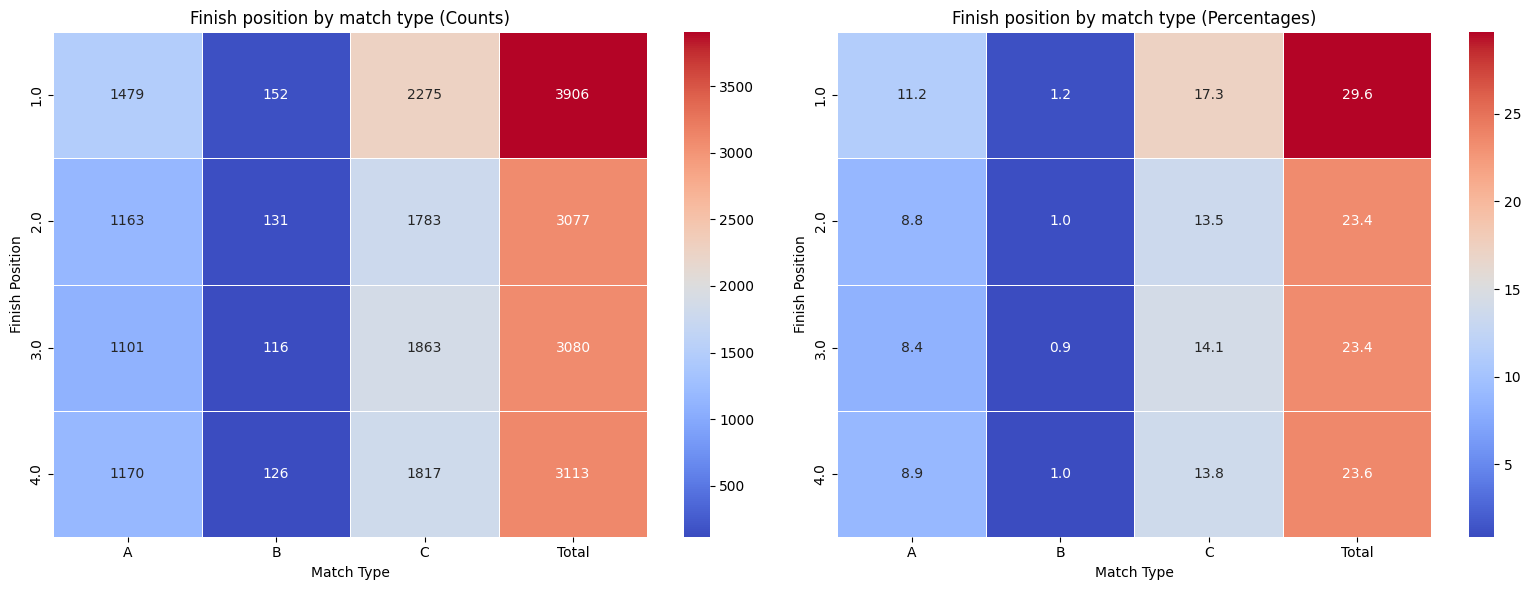

In [13]:
%matplotlib inline
print("Total sum of n_matches divided by total count of unique users for the entire date range:", ratio)
fig_match.show()
plt.show()

# Section 2.5: Graphs

In [14]:
fig_game.show()
# Print additional information
print(f"The most played match type: {most_popular_match_type}")
print(f"The easiest match type: {easiest_match_type}")
print(f"Most popular match type is {most_popular_match_type} as it has been played by {percentage_users_popular_match_type:.2f}% users.")
print(f"The match type '{easiest_match_type}' has the highest number of finish positions, indicating it might be the easiest game.")

The most played match type: C
The easiest match type: A
Most popular match type is C as it has been played by 50.29% users.
The match type 'A' has the highest number of finish positions, indicating it might be the easiest game.


# 3. In app Purchases

**Section 3: In-App Purchases Analysis**
In this section, we delve into the analysis of in-app purchases, focusing on the revenue generated by different product groups, the number of purchases made, and the trends over time.

**Sum of Revenue by Product Group**

The pie chart titled “Sum of Revenue by Product Group” shows the distribution of revenue across different product groups. The results are as follows:


1. Gold: 44.5% (3552)
2. Remove Ads: 25.8% (2060)
3. Promotion: 29.7% (2371)

This indicates that the majority of the revenue is generated from the sale of Gold, followed by Promotions and Remove Ads.

**Sum of Purchase Number by Product Group**

The pie chart titled “Sum of Purchase Number by Product Group” shows the distribution of the number of purchases across different product groups. The results are as follows:

1. Remove Ads: 38% (413)
2. Gold: 27.5% (299)
3. Promotion: 34.5% (375)

This suggests that while Gold generates the most revenue, Remove Ads has the highest number of purchases, followed by Promotions and Gold.


**Sum of Purchase Number by Product Group Over Time**

The bar chart titled “Sum of Purchase Number by Product Group Over Time” illustrates the trend of purchases over time for each product group. The chart shows several peaks and troughs, indicating fluctuations in the number of purchases. For instance, there is a significant spike in the number of purchases for Remove Ads on December 27, 2023, and February 3, 2024. Similarly, there are noticeable peaks for Gold on December 27, 2023, and February 28, 2024. The Promotion product group also shows several peaks, with the most notable ones on February 20, 2024, and February 27, 2024.

Overall, the analysis provides valuable insights into the revenue and purchase patterns of different product groups. These insights can be used to inform strategies for promoting specific product groups, optimizing pricing, and enhancing the overall revenue generation of the game. It’s also important to consider these trends when planning future updates or features for the game. For instance, the popularity of the Remove Ads product group suggests that users value an ad-free experience, which could be leveraged in future game design decisions. Similarly, the high revenue from Gold sales indicates that users are willing to spend on in-game currency, suggesting potential opportunities for introducing new in-game items or features that can be purchased with Gold.


# Section 3: Code

In [15]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# Convert 'activity_date' column to datetime type
purchases['activity_date'] = pd.to_datetime(purchases['activity_date'])

# Filter dates for the given range
filtered_purchases = purchases[(purchases['activity_date'] >= '2023-12-01') &
                               (purchases['activity_date'] <= '2024-02-29')]

# Define a color scale with pastel colors for consistency across plots
color_scale_pastel = {
    'Gold': 'lightblue',
    'Promotion': 'lightgreen',
    'Remove Ads': 'lightsalmon',
    # Add more products and their pastel colors as needed
}

# Calculate revenue and group by 'product_group'
filtered_purchases['revenue'] = filtered_purchases['dollar_purchase_value'] * filtered_purchases['purchase_number']
sum_revenue_by_product_group = filtered_purchases.groupby('product_group', as_index=False)['revenue'].sum()

# Group by 'product_group' for 'purchase_number'
sum_purchase_number_by_product_group = filtered_purchases.groupby('product_group', as_index=False)['purchase_number'].sum()

# Create a subplot with 1 row and 2 columns, specifying the type as 'domain' for pie charts
fig_product_pie = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=('Sum of Revenue by Product Group', 'Sum of Purchase Number by Product Group'))

# Add the pie charts to the subplots with consistent pastel colors
fig_product_pie.add_trace(go.Pie(labels=sum_revenue_by_product_group['product_group'], values=sum_revenue_by_product_group['revenue'],
                                 name='Revenue', marker_colors=[color_scale_pastel[product] for product in sum_revenue_by_product_group['product_group']]), row=1, col=1)
fig_product_pie.add_trace(go.Pie(labels=sum_purchase_number_by_product_group['product_group'], values=sum_purchase_number_by_product_group['purchase_number'],
                                 name='Purchase Number', marker_colors=[color_scale_pastel[product] for product in sum_purchase_number_by_product_group['product_group']]), row=1, col=2)

# Update layout if needed
fig_product_pie.update_layout(height=400, width=1500, title_text="Side by Side Comparison for Dec 2023 - Feb 2024")

# Group by 'activity_date' and 'product_group' and calculate the sum of 'purchase_number'
sum_purchase_number_by_date_product_group = filtered_purchases.groupby(['activity_date', 'product_group'])['purchase_number'].sum().reset_index()

# Plotting with Plotly for purchase number by product group over time with consistent pastel colors
fig_Purchase_by_group = px.bar(sum_purchase_number_by_date_product_group, x='activity_date', y='purchase_number',
                               color='product_group', title='Sum of Purchase Number by Product Group Over Time (Dec 2023 - Feb 2024)',
                               labels={'activity_date': 'Activity Date', 'purchase_number': 'Sum of Purchase Number'},
                               barmode='stack', color_discrete_map=color_scale_pastel)

fig_Purchase_by_group.update_layout(width=1500, height=400);


<ipython-input-15-5394ef937fea>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Section 3: Graphs

In [16]:
fig_product_pie.show()
fig_Purchase_by_group.show()



---



# 4. Virtual purchases

Section 4: User Engagement and Expenditure Metrics for In-Game Products

In this section, we delve into the analysis of user engagement and expenditure on in-game products. The data provided includes the number of unique users, total purchases, total gold spent, purchases per user, and gold spent per user for different product groups.

The product groups include Boosts, Energy, Gear, and Weapons. Here are some key insights:

1. **Most Popular Purchases by Product Group**: The product group with the most purchases is 'Weapon' with a total of 4513 purchases. This suggests that weapons are a popular choice among players, possibly due to their impact on gameplay and match outcomes.

2. **Gold Spent**: Players spent the most gold on 'Gear' (4.7M) and 'Weapon' (4.1M). This indicates that these product groups are not only popular but also high-value items in the game.

3. **Number of Purchases**: The number of purchases made by players varies across product groups. 'Weapon' leads with 4513 purchases, followed by 'Energy' (1082), 'Boosts' (619), and 'Gear' (610).

4. **Number of Purchases by Activity Date (Dec 2023 - Feb 2024)**: The number of purchases made by players shows a fluctuating trend over time. There are several peaks indicating periods of high activity or events that might have triggered increased purchases. For instance, there is a significant spike in purchases on January 31, 2024, with 66 purchases made on that day.

Now, let's dive deeper into each product group:

- **Boosts**: There were 177 unique users who made a total of 619 purchases, spending 1.3M gold. On average, each user made approximately 1.29 purchases and spent around 2776.83 gold.

- **Energy**: There were 133 unique users who made a total of 1082 purchases, spending 1.2M gold. On average, each user made approximately 1.75 purchases and spent around 2008.24 gold.

- **Gear**: There were 167 unique users who made a total of 610 purchases, spending a whopping 4.7M gold. On average, each user made approximately 1.88 purchases and spent around 14607.7 gold.

- **Weapon**: There were 511 unique users who made a total of 4513 purchases, spending 4.1M gold. On average, each user made approximately 2.35 purchases and spent around 2110.76 gold.

These insights can help the game developers understand player preferences and spending habits. For instance, the high expenditure on 'Gear' and 'Weapon' suggests that these items significantly enhance the gaming experience. Therefore, introducing new items in these categories or offering special deals could boost player engagement and revenue. Similarly, the popularity of 'Weapon' indicates that combat is a crucial aspect of the game, and improvements or updates in this area could be well-received by the players.

On the other hand, the lower expenditure on 'Boosts' and 'Energy' might indicate that these items are perceived as less valuable or impactful. This could be an area for improvement, either by enhancing the benefits of these items or by better communicating their value to the players.

Overall, these insights provide a comprehensive understanding of user engagement and expenditure on in-game products, which can guide decision-making and strategy for future game updates and enhancements.

# Section 4: Code

In [17]:
# Group the data by 'product_group' and calculate the required metrics
grouped = virtual_purchases.groupby('product_group').agg(
    unique_users=('user_id', 'nunique'),
    total_purchases=('n_purchases', 'sum'),
    total_gold_spend=('gold_spend', 'sum'),
    purchase_per_user=('n_purchases', 'mean'),
    gold_spend_per_user=('gold_spend', 'mean')
).reset_index()

# Format the columns
grouped['total_gold_spend'] = grouped['total_gold_spend'].astype(int)
grouped['purchase_per_user'] = grouped['purchase_per_user'].round(2)
grouped['gold_spend_per_user'] = grouped['gold_spend_per_user'].round(2)

table_1 = tabulate(grouped, headers='keys', tablefmt='fancy_grid', showindex=False)

In [18]:
# Assuming 'virtual_purchases' is a DataFrame with the necessary data
grouped_data = virtual_purchases.groupby('product_group').agg({'n_purchases': 'sum', 'gold_spend': 'sum'}).reset_index()

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Gold Spent', 'Number of Purchases'))

# Add the first bar graph for gold spend to the first column of the subplot
fig.add_trace(
    go.Bar(x=grouped_data['product_group'], y=grouped_data['gold_spend'], name='Gold Spent'),
    row=1, col=1
)

# Add the second bar graph for the number of purchases to the second column of the subplot
fig.add_trace(
    go.Bar(x=grouped_data['product_group'], y=grouped_data['n_purchases'], name='Number of Purchases'),
    row=1, col=2
)

# Update the layout for a cleaner look
fig.update_layout(
    title='Most Popular Virtual Purchases by Product Group',
    showlegend=False,
    width=1500,  # Set the width to 1500 pixels
    height=500
);


In [19]:
# Filter dates from December 2023 to end of February 2024
filtered_purchases = virtual_purchases[(virtual_purchases['activity_date'] >= '2023-12-01') &
                                       (virtual_purchases['activity_date'] <= '2024-02-29')]

# Group by 'activity_date' and calculate the sum of 'n_purchases'
purchases_by_date = filtered_purchases.groupby('activity_date')['n_purchases'].sum().reset_index()

# Plotting with Plotly
fig_purchase_date = px.line(purchases_by_date, x='activity_date', y='n_purchases',
              title='Number of Purchases by Activity Date (Dec 2023 - Feb 2024)',
              labels={'activity_date': 'Activity Date', 'n_purchases': 'Number of Purchases'})

fig_purchase_date.update_layout(width=1500, height=400);

# Section 4: Graphs

In [20]:
print(table_1)
fig.show()
fig_purchase_date.show()

╒═════════════════╤════════════════╤═══════════════════╤════════════════════╤═════════════════════╤═══════════════════════╕
│ product_group   │   unique_users │   total_purchases │   total_gold_spend │   purchase_per_user │   gold_spend_per_user │
╞═════════════════╪════════════════╪═══════════════════╪════════════════════╪═════════════════════╪═══════════════════════╡
│ Boosts          │            177 │               619 │            1332878 │                1.29 │               2776.83 │
├─────────────────┼────────────────┼───────────────────┼────────────────────┼─────────────────────┼───────────────────────┤
│ Energy          │            133 │              1082 │            1243100 │                1.75 │               2008.24 │
├─────────────────┼────────────────┼───────────────────┼────────────────────┼─────────────────────┼───────────────────────┤
│ Gear            │            167 │               610 │            4732904 │                1.88 │              14607.7  │
├───────



---



# 5. Analysis of New Users' Purchases

Section 5: Analysis of New Users' Purchases

This section provides an analysis of the purchases made by new users who joined in January. The table below lists all the new users who made purchases, along with their total purchase number, total dollar purchase value, total gold spent, days logged on, and count activity date.

| User ID | Total Purchase Number | Total Dollar Purchase Value | Total Gold Spend | Days Logged On | Count Activity Date |
|---------|-----------------------|-----------------------------|------------------|----------------|---------------------|
| 1677    | 1                     | 4.99                        | 0.00             | 1              | 1                   |
| 4270    | 3                     | 9.98                        | 0.00             | 2              | 2                   |
| 9411    | 220                   | 199.60                      | 18970.00         | 8              | 40                  |

Here are some key insights derived from the table:

1. **User Engagement**: User 9411 shows the highest engagement with 40 activity counts and 8 days logged on. This user also made the most purchases (220), indicating a high level of engagement and investment in the game.

2. **Spending Habits**: User 9411 spent the most, both in terms of dollar purchase value ($199.60) and gold spend (18970.00). This suggests that this user is highly invested in the game and is willing to spend both real money and in-game currency for purchases.

3. **New User Spending**: Users 1677 and 4270, despite being new, have already started making purchases, indicating their willingness to spend on the game. However, their spending is significantly lower compared to User 9411, which could be due to them still exploring the game.

4. **Gold Spend**: It's interesting to note that while Users 1677 and 4270 have made purchases, they have not spent any gold yet. This could suggest that they are either saving their gold for future use or they have not yet engaged with aspects of the game that require gold spend.

Overall, these insights provide valuable information about the spending habits and engagement levels of new users. This can help in tailoring the game's monetization strategies, improving user retention, and enhancing the gaming experience for new users. For instance, introducing special offers or tutorials could encourage new users like 1677 and 4270 to spend their gold. Similarly, understanding the preferences and spending habits of highly engaged users like 9411 can help in developing features and updates that cater to such players.

# Section 5: code

In [21]:
# Get all unique user IDs from daily_activity
unique_users_activity = daily_activity['user_id'].unique()

# Create a DataFrame from the unique user IDs
unique_users_df = pd.DataFrame({'user_id': unique_users_activity})

# Left join this with the purchases data
user_purchases = pd.merge(unique_users_df,
                          purchases[['user_id', 'activity_date', 'purchase_number', 'product_group', 'dollar_purchase_value']],
                          how='left',
                          on='user_id')

# Remove rows with null data
user_purchases = user_purchases.dropna().reset_index(drop=True)

# Left join with virtual_purchases data
user_virtual_purchases = pd.merge(user_purchases,
                                  virtual_purchases[['user_id', 'gold_spend']],
                                  how='left',
                                  on='user_id')

# Group by 'user_id' and calculate the sum of 'purchase_number', 'dollar_purchase_value', 'gold_spend', and count of unique 'activity_date'
grouped_user_purchases = user_virtual_purchases.groupby('user_id').agg(
    total_purchase_number=('purchase_number', 'sum'),
    total_dollar_purchase_value=('dollar_purchase_value', 'sum'),
    total_gold_spend=('gold_spend', 'sum'),
    days_logged_on=('activity_date', 'nunique'),
    count_activity_date=('activity_date', 'count')
).reset_index()

# Format columns
grouped_user_purchases['total_dollar_purchase_value'] = grouped_user_purchases['total_dollar_purchase_value'].map('${:,.2f}'.format)
grouped_user_purchases['total_gold_spend'] = grouped_user_purchases['total_gold_spend'].map('${:,.2f}'.format)

# Convert DataFrame to tabular format
table_2 = tabulate(grouped_user_purchases, headers='keys', tablefmt='fancy_grid', showindex=False, numalign='center')

# Section 5: Graph

In [22]:

print(table_2)

╒═══════════╤═════════════════════════╤═══════════════════════════════╤════════════════════╤══════════════════╤═══════════════════════╕
│  user_id  │  total_purchase_number  │ total_dollar_purchase_value   │ total_gold_spend   │  days_logged_on  │  count_activity_date  │
╞═══════════╪═════════════════════════╪═══════════════════════════════╪════════════════════╪══════════════════╪═══════════════════════╡
│   1677    │            1            │ $4.99                         │ $0.00              │        1         │           1           │
├───────────┼─────────────────────────┼───────────────────────────────┼────────────────────┼──────────────────┼───────────────────────┤
│   4270    │            3            │ $9.98                         │ $0.00              │        2         │           2           │
├───────────┼─────────────────────────┼───────────────────────────────┼────────────────────┼──────────────────┼───────────────────────┤
│   9411    │           220           │ $199.60 

# Summary

The Miniclip Technical Challenge is a data analysis task for the game Combat Elite. The challenge evaluates a candidate's ability to analyze data, derive insights, and communicate findings. The datasets include user activity, matches played, in-app purchases, and gold purchases.

In January 2024, the game gained 694 new users, mainly on Android. User activity peaked at 90 unique users on January 30th. Match Type C was the most popular, with players performing well in this type.

Revenue is primarily from Gold sales (44.5%), followed by Promotions (29.7%) and Remove Ads (25.8%). Weapons were the most purchased item, with players spending most gold on Gear and Weapon.

User 9411 showed high engagement and made the most purchases. New users 1677 and 4270 have started making purchases. These insights can help tailor monetization strategies, improve user retention, and enhance the gaming experience.

The analysis reveals that the game experienced a significant influx of new users in January 2024, primarily driven by the Android platform. The daily activity levels gradually increased throughout the month, reaching a peak towards the end of January.

Match Type C emerges as the clear favorite, accounting for 58.7% of all matches played. This match type also boasts the highest number of first-place finishes, suggesting that players not only prefer but also perform well in this match type.

The analysis provides valuable insights into the revenue and purchase patterns of different product groups. These insights can be used to inform strategies for promoting specific product groups, optimizing pricing, and enhancing the overall revenue generation of the game. It’s also important to consider these trends when planning future updates or features for the game. For instance, the popularity of the Remove Ads product group suggests that users value an ad-free experience, which could be leveraged in future game design decisions. Similarly, the high revenue from Gold sales indicates that this should be a focus for monetization strategies.